In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

In [12]:
data = pd.read_csv('/Users/harvinderpower/Projects/machine-learning/Breast Cancer/data.csv', header=0)

In [13]:
print(data.head)

<bound method DataFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [15]:
data.drop('id', axis=1, inplace = True)
data.drop("Unnamed: 32",axis=1,inplace=True)
#removing the columns which are not relevant, once done, this does not need to be done again

In [16]:
data.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [17]:
features_mean = list(data.columns[1:11])
features_se = list(data.columns[11:20])
features_worst = list(data.columns[20:31])
#splitting the data into the 3 different sets provided

In [18]:
print features_mean, features_se, features_worst

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se'] ['fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [19]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
#remap the values for malignant and benign to being 1 or 0

In [20]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


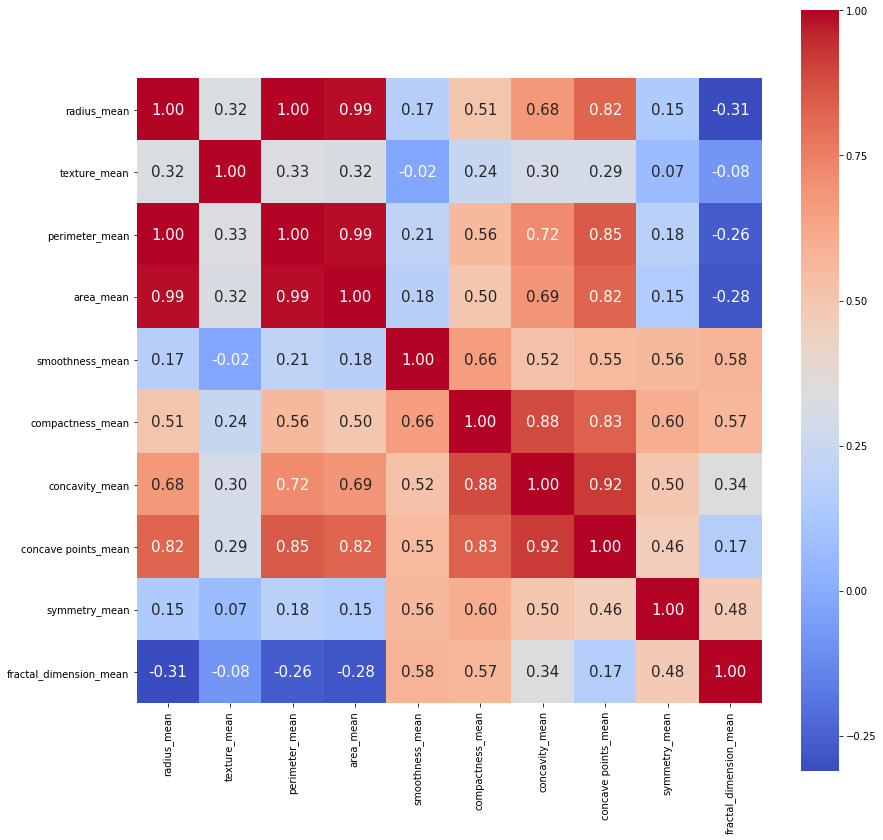

In [21]:
corr = data[features_mean].corr()
plt.figure(figsize =(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

#This is able to determine the correlation between certain functions visually, evidently, some already show this e.g radius and perimeter due to the equation to calculate radius

In [25]:
prediction_var = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean']
#these are to be used as the features for anlaysis of the sample

In [26]:
train, test = train_test_split(data, test_size = 0.3)
print "Train shape", (train.shape)
print "Test shape", (test.shape)

Train shape (398, 31)
Test shape (171, 31)


In [27]:
train_x = train[prediction_var]
train_y = train.diagnosis

test_x = test[prediction_var]
test_y = test.diagnosis

In [29]:
model = RandomForestClassifier(n_estimators=100)

In [30]:
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [33]:
prediction = model.predict(test_x)
print "Accuracy =", metrics.accuracy_score(prediction, test_y)

Accuracy = 0.93567251462


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b8f4b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110b73e90>]], dtype=object)

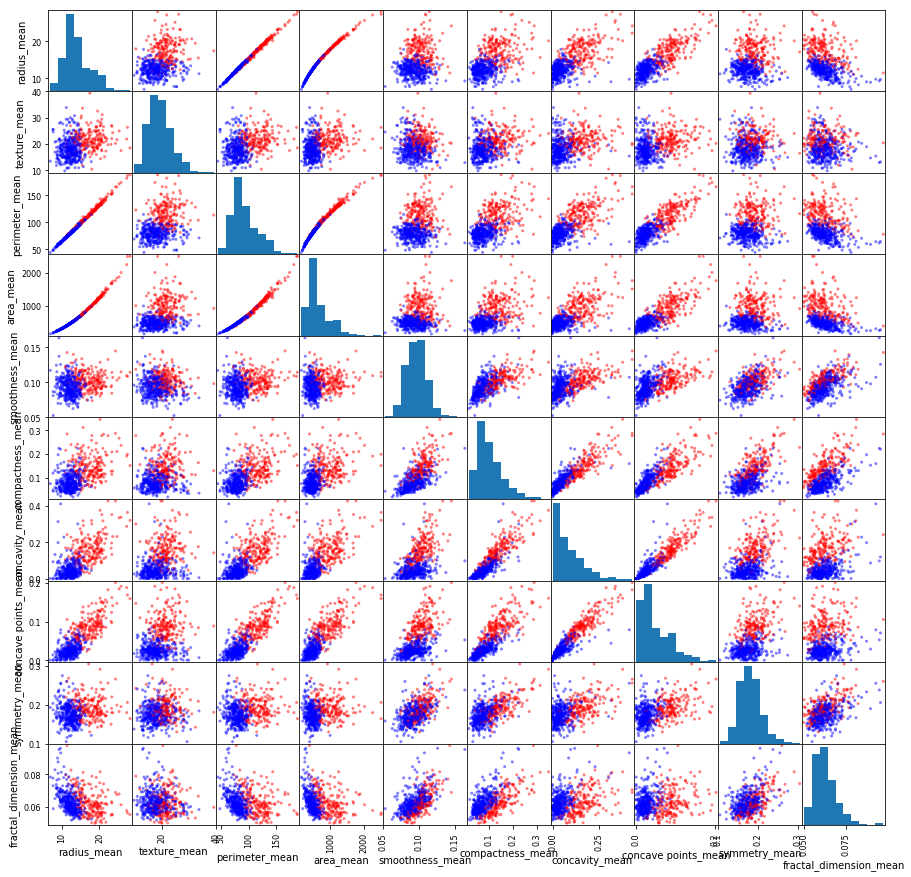

In [32]:
color_function = {0: 'blue', 1: 'red'}
#0 = blue, 1 = red
colors = data['diagnosis'].map(lambda x: color_function.get(x))
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15,15))

In [39]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')